**Analysis of weekly traffic in Austin.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from matplotlib import pyplot as plt
import numpy as np
!pip install matrixprofile 
import matrixprofile as mp

     |████████████████████████████████| 1.1MB 8.6MB/s 
     |████████████████████████████████| 1.3MB 35.6MB/s 
ERROR: googleapis-common-protos 1.53.0 has requirement protobuf>=3.12.0, but you'll have protobuf 3.11.2 which is incompatible.
ERROR: google-api-core 1.26.3 has requirement protobuf>=3.12.0, but you'll have protobuf 3.11.2 which is incompatible.
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


**Required Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import glob
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py



In [5]:
data=df =pd.read_csv('/content/drive/MyDrive/daily_average_road_intersection_traffic_volume[1].csv')  
data

,year,week_of_year,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,2020,2,NaN,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667
1,2020,3,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667
2,2020,4,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333
3,2020,5,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667
4,2020,6,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000
...,...,...,...,...,...,...,...,...,...
62,2021,11,23230.714286,23183.285714,24098.857143,24803.857143,25985.000000,23129.571429,19230.857143
63,2021,12,25899.333333,21727.500000,24844.142857,30712.750000,32193.125000,23505.857143,23018.375000
64,2021,13,24616.857143,29582.875000,30693.125000,26878.571429,31486.125000,21356.428571,16289.857143
65,2021,14,24499.857143,24615.000000,24683.571429,24832.714286,26124.571429,23013.428571,19079.142857


**As the data contains some null values so I assigned them with the mean value for that particular day.**

In [6]:

data['monday'].fillna(value=24165.405893, inplace=True)
data['tuesday'].fillna(value=24961.200737, inplace=True)
data['wednesday'].fillna(value=25315.679089, inplace=True)
data['thursday'].fillna(value=25260.732173, inplace=True)
data['friday'].fillna(value=26322.776365, inplace=True)
data['saturday'].fillna(value=22405.154244, inplace=True)
data['sunday'].fillna(value=18729.522118, inplace=True)

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.head(10)
df=data
df

,year,week_of_year,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,2020,2,24165.405893,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667
1,2020,3,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667
2,2020,4,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333
3,2020,5,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667
4,2020,6,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000
...,...,...,...,...,...,...,...,...,...
62,2021,11,23230.714286,23183.285714,24098.857143,24803.857143,25985.000000,23129.571429,19230.857143
63,2021,12,25899.333333,21727.500000,24844.142857,30712.750000,32193.125000,23505.857143,23018.375000
64,2021,13,24616.857143,29582.875000,30693.125000,26878.571429,31486.125000,21356.428571,16289.857143
65,2021,14,24499.857143,24615.000000,24683.571429,24832.714286,26124.571429,23013.428571,19079.142857


**Renaming the columns of the days as monday being 1 and sunday being 7.**

In [9]:
data.rename(columns = {'monday' : '1', 'tuesday' : '2','wednesday':'3','thursday':'4','friday':'5','saturday':'6','sunday':'7'}, inplace = True)
data.head(7)

,year,week_of_year,1,2,3,4,5,6,7
0,2020,2,24165.405893,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667
1,2020,3,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667
2,2020,4,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333
3,2020,5,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667
4,2020,6,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000
5,2020,7,32596.166667,32916.083333,33823.833333,36364.333333,36591.583333,28695.666667,24955.750000
6,2020,8,33654.545455,34235.750000,34390.583333,36630.000000,39295.454545,30123.166667,24055.333333


**Some data transformation so that we can do the required analysis.**

In [10]:
day=[]
tra=[]
ind=[]

In [11]:
for i in range(67):
  g=i+2
  for j in range(7):
    j=j+2
    day.append(data.columns[j])
    tra.append(data.iloc[i,j])
    
    ind.append(g)
len(ind)

469

In [12]:
len(day)

469

In [13]:
len(tra)

469

In [14]:
lis=[ind,day,tra]

In [15]:
dfinal=pd.DataFrame(list(zip(ind,day,tra)), columns =['Week Number', 'Day','Traffic'])
dfinal

,Week Number,Day,Traffic
0,2,1,24165.405893
1,2,2,33166.416667
2,2,3,33764.416667
3,2,4,33971.166667
4,2,5,32076.666667
...,...,...,...
464,68,3,25315.679089
465,68,4,25260.732173
466,68,5,9857.166667
467,68,6,17116.250000


In [16]:
dfinal.isnull().sum()

Week Number    0
Day            0
Traffic        0
dtype: int64

In [17]:
dfinal.columns

Index(['Week Number', 'Day', 'Traffic'], dtype='object')

In [18]:

x = dfinal[['Week Number','Day','Traffic']].values

**find the optimal number of clusters using elbow method  -- >This is for 3 features = [Week Number,Day,Traffic]**



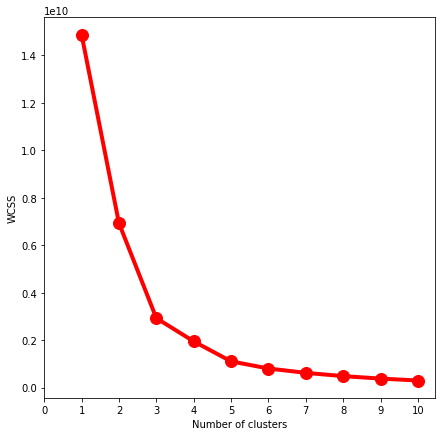

In [19]:


WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

**From the curve we can interpret that 5 is optimal for clustering.**

In [20]:
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



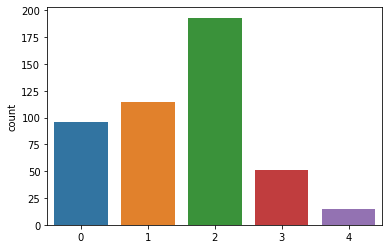

In [21]:
sns.countplot(y_clusters)

In [22]:
print(x[y_clusters == 0,0][1])
print(x[y_clusters == 0,1][1])
print(x[y_clusters == 0,2][1])

12
6
15074.833333333336


**3d scatterplot using plotly**

In [23]:

Scene = dict(xaxis = dict(title  = 'Week Number'),yaxis = dict(title  = 'WEEK DAY INDEX'),zaxis = dict(title  = 'Traffic'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

**Day wise plot wrt traffic**

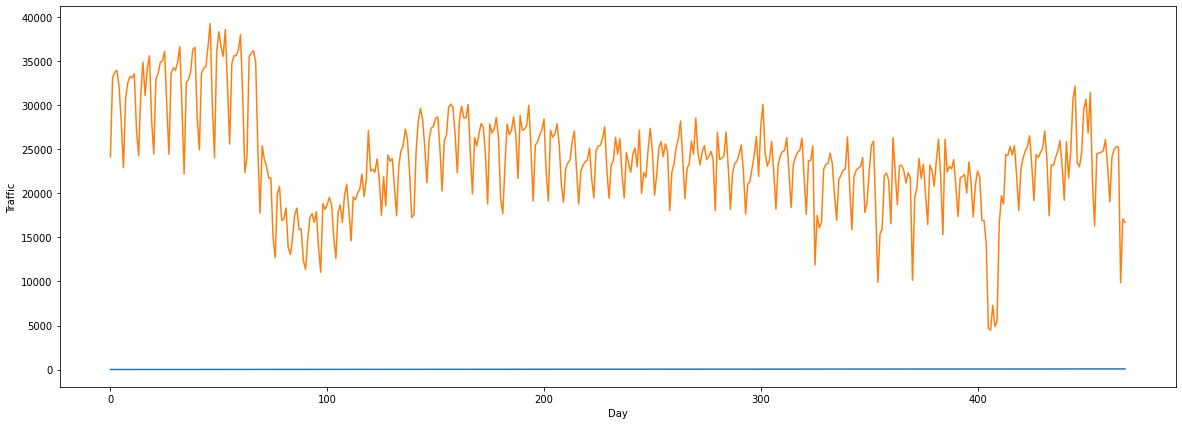

In [24]:
dfinal.plot(figsize=(20,7), legend=None)
plt.xlabel('Day')
plt.ylabel('Traffic')
plt.show()

**Now we will explore matrix profile for the data with 3 window sizes viz 4 days , 7 days and 12 days**


In [37]:
windows = [
    ('4 days', 4),
    ('7 days',7),
    ('12 days', 12),
]

profiles = {}

for label, window_size in windows:
    profile = mp.compute(dfinal['Traffic'].values, window_size)
    key = '{} Profile'.format(label)
    profiles[key] = profile

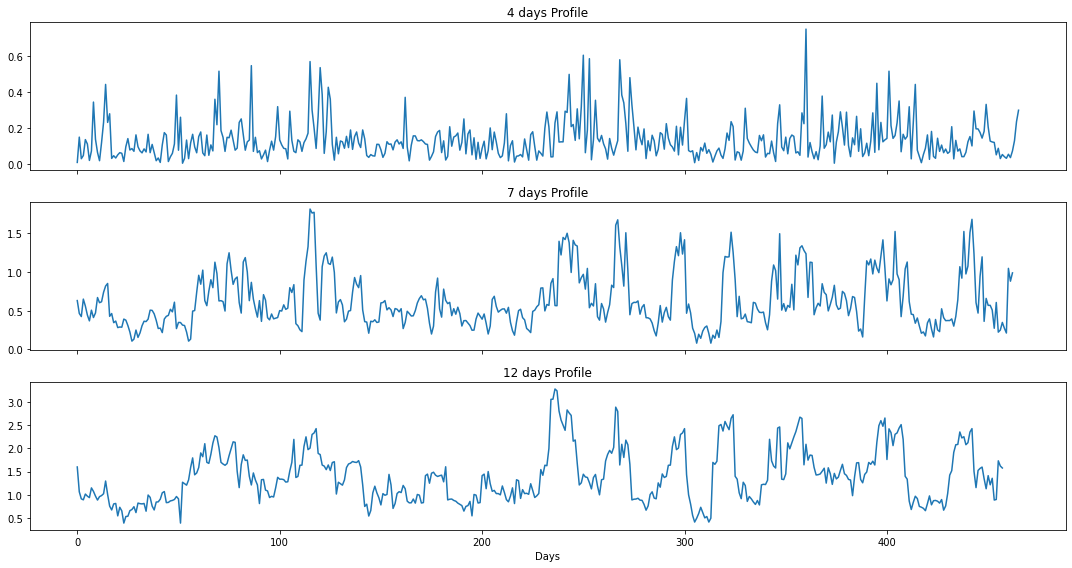

In [26]:
#Plot the signal data
fig, axes = plt.subplots(3,1,sharex=True,figsize=(15,8))

for ax_idx, window in enumerate(windows):
    key = '{} Profile'.format(window[0])
    profile = profiles[key]
    axes[ax_idx].plot(profile['mp'])
    axes[ax_idx].set_title(key)

plt.xlabel('Days')
plt.tight_layout()
plt.show()

**Here we find the top anomalies for each window. An exclusion zone is required to avoid matching on time periods that are very close to one another.**

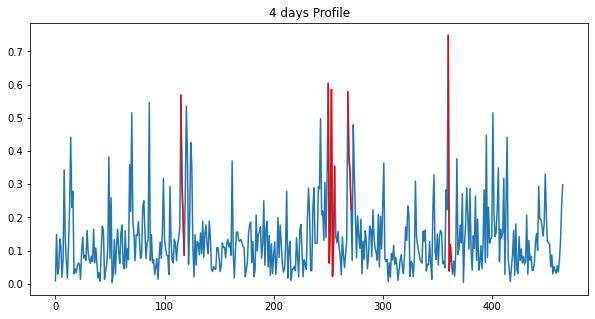

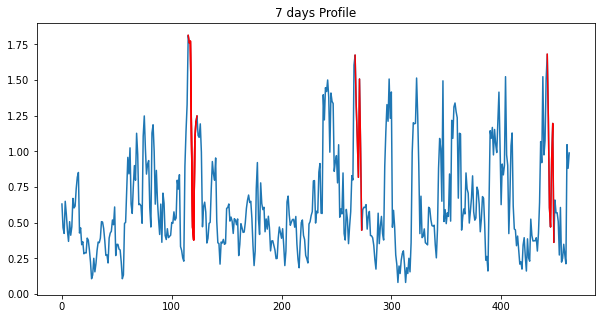

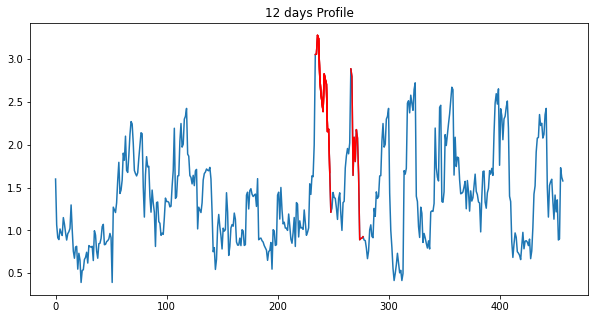

In [27]:


for label, window_size in windows:
    key = '{} Profile'.format(label)
    profiles[key] = mp.discover.discords(profiles[key], k=5)
    
    window_size = profiles[key]['w']
    mp_adjusted = np.append(profiles[key]['mp'], np.zeros(window_size - 1) + np.nan)
    
    plt.figure(figsize=(10, 5))
    ax = plt.plot(dfinal.index.values, mp_adjusted)
    plt.title(key)
    
    for start_index in profiles[key]['discords']:
        x = dfinal.index.values[start_index:start_index+window_size]
        y = mp_adjusted[start_index:start_index+window_size]
        plt.plot(x, y, c='r')
    
    plt.show()

**Separate analysis of 7 Days profile.**

In [28]:

key = '7 days Profile'
profile = profiles[key]
window_size = profile['w']
mp_adjusted = np.append(profile['mp'], np.zeros(window_size - 1) + np.nan)
dfinal[key] = mp_adjusted

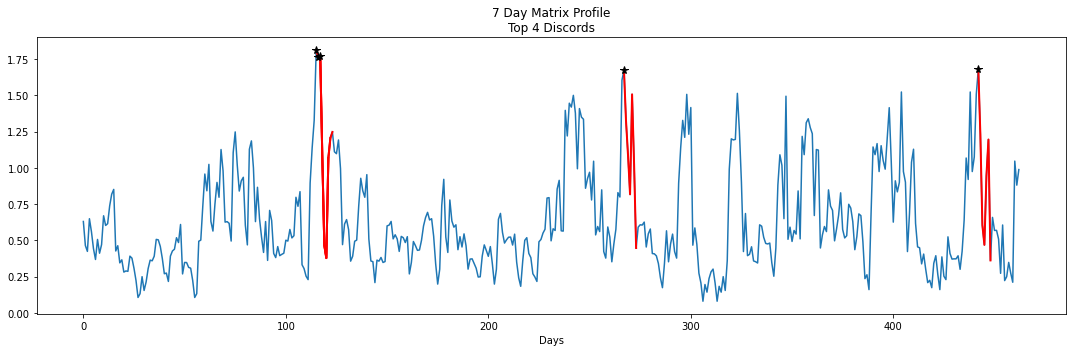

In [29]:
ax = dfinal[key].plot(title='7 Day Matrix Profile\nTop 4 Discords', figsize=(15,5))

for discord in profile['discords']:
    dfinal.iloc[discord:discord+window_size][key].plot(ax=ax, c='r', lw='2')

dfinal.iloc[profile['discords']][key].plot(kind='line', marker='*', c='black', markersize=8, ax=ax, lw=0)
plt.xlabel('Days')
plt.tight_layout()
plt.show()

In [30]:
dfinal.head(20)

,Week Number,Day,Traffic,7 days Profile
0,2,1,24165.405893,0.630750
1,2,2,33166.416667,0.464762
2,2,3,33764.416667,0.424471
3,2,4,33971.166667,0.649804
4,2,5,32076.666667,0.560154
5,2,6,28167.583333,0.443638
6,2,7,22937.916667,0.368695
7,3,1,30811.750000,0.506906
8,3,2,32568.333333,0.411838
9,3,3,33294.250000,0.471159


In [31]:
dfinal.columns

Index(['Week Number', 'Day', 'Traffic', '7 days Profile'], dtype='object')

In [32]:
del dfinal['Week Number']

In [33]:
del dfinal['7 days Profile']

In [34]:
dfinal

,Day,Traffic
0,1,24165.405893
1,2,33166.416667
2,3,33764.416667
3,4,33971.166667
4,5,32076.666667
...,...,...
464,3,25315.679089
465,4,25260.732173
466,5,9857.166667
467,6,17116.250000


In [35]:
busiest_day = dfinal.groupby(["Day"]).sum().sort_values("Traffic",ascending=False)
busiest_day = busiest_day.reset_index()
busiest_day

,Day,Traffic
0,5,1.763626e+06
1,3,1.696150e+06
2,4,1.692469e+06
3,2,1.672400e+06
4,1,1.619082e+06
5,6,1.501145e+06
6,7,1.254878e+06


**Now I have plotted a bar graph of days vs total traffic**

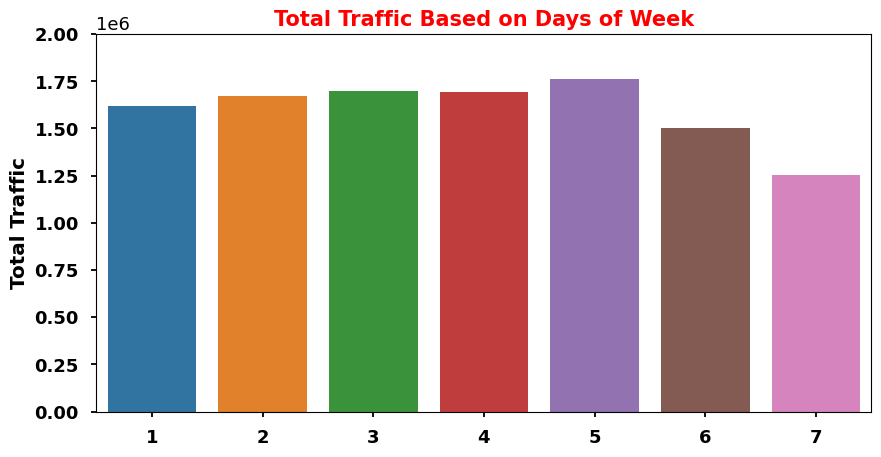

In [36]:
plt.figure(figsize=(10,5),dpi=100),
plt.style.use('seaborn-talk')

ax = sns.barplot(x="Day",y="Traffic",data=busiest_day, order=["1","2","3","4",
                                                                       "5","6","7"])

plt.title("Total Traffic Based on Days of Week", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Traffic",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.ylim(0,2000000)
plt.show()

**From plot we can infer that friday has maximum traffic and sunday has lowest.**

Submitted by :

**Sakshi Pandey**

Indian Institute Of Technology ,Indore